# USA Population -- Python Final Project

Python Project Team KPV

In [155]:
import pandas as pd
import numpy as np
import seaborn as sns
%pylab inline

import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus

Populating the interactive namespace from numpy and matplotlib


C:\Users\Manisha\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning:

pylab import has clobbered these variables: ['Figure', 'Annotation']
`%matplotlib` prevents importing * from pylab and numpy



# Dataset Description 

The dataset that Team KPV is using is the USA Census data where we are capturing basic information about people country wise like their income, their mode of commute, daily type of work to get a closer look at their life and ways.

<ul>
<li> <b> df</b> is a dataset of census information for each census tract in the USA. </li>
<li> <b> df2</b> is a dataset of age-adjusted mortality rates for each county in the USA.</li>
<li> <b> df_all </b>  is the merged dataset between <b> df </b> and <b> df2 </b>.
</ul>

The columns in <b> df </b> are:
<ol>
<li> State : State, DC, or Puerto Rico, String </li>
<li> County: County or county equivalent , String </li>
<li> TotalPop: Total population, Numeric </li>
<li> Men: Number of men, Numeric </li>
<li> Women: Number of women, Numeric </li>
<li> Hispanic: % of population that is Hispanic/Latino, Numeric </li>
<li> White: % of population that is white, Numeric </li>
<li> Black: % of population that is black,  Numeric </li>
<li> Native: % of population that is Native American or Native Alaskan, Numeric </li>
<li> Asian: % of population that is Asian, Numeric </li>
<li> Pacific: % of population that is Native Hawaiian or Pacific Islander, Numeric </li>
<li> Citizen: Number of citizens, Numeric </li>
<li> Income: Median household income (dollars), Numeric </li>
<li> IncomeErr: Median household income error (dollars), Numeric </li>
<li> IncomePerCap: Income per capita (dollars), Numeric </li>
<li> IncomePerCapErr: Income per capita error (dollars), Numeric </li>
<li> Poverty: % under poverty level, Numeric </li>
<li> ChildPoverty: % of children under poverty level, Numeric </li>
<li> Professional: % employed in management, business, science, and arts, Numeric </li>
<li> Service: % employed in service jobs, Numeric </li>
<li> Office: % employed in sales and office jobs, Numeric </li>
<li> Construction: % employed in natural resources, construction, and maintenance, Numeric </li>
<li> Production: % employed in production, transportation, and material movement, Numeric </li>
<li> Drive: % commuting alone in a car, van, or truck, Numeric </li>
<li> Carpool: % carpooling in a car, van, or truck, Numeric </li>
<li> Transit: % commuting on public transportation, Numeric </li>
<li> Walk: % walking to work, Numeric </li>
<li> OtherTransp: % commuting via other means, Numeric </li>
<li> WorkAtHome: % working at home, Numeric </li>
<li> MeanCommute: Mean commute time (minutes), Numeric </li>
<li> Employed: Number employed (16+), Numeric </li>
<li> PrivateWork: % employed in private industry, Numeric </li>
<li> PublicWork: % employed in public jobs, Numeric </li>
<li> SelfEmployed: % self-employed, Numeric </li>
<li> FamilyWork: % in unpaid family work, Numeric </li>
<li> Unemployment: Unemployment rate (%), Numeric </li>

</ol>

<b> df2 </b> is the age-adjusted mortality rates (per 100,000 people) of various diseases by county. The columns in <b> df2 </b> are:
<ol>
<li> Location: the county and state name </li>
<li> FIPS: county ID </li>
<li> HIV/AIDS and tuberculosis </li>
<li> Diarrhea, lower respiratory, and other common infectious diseases </li>
<li> Neglected tropical diseases and malaria </li>
<li> Maternal disorders </li>
<li> Neonatal disorders </li>
<li> Nutritional deficiencies </li>
<li> Other communicable, maternal, neonatal, and nutritional diseases </li>
<li> Neoplasms </li>
<li> Cardiovascular diseases </li>
<li> Chronic respiratory diseases </li>
<li> Cirrhosis and other chronic liver diseases </li>
<li> Digestive diseases </li>
<li> Neurological disorders </li>
<li> Mental and substance use disorders </li>
<li> Diabetes, urogenital, blood, and endocrine diseases </li>
<li> Musculoskeletal disorders </li>
<li> Other non-communicable diseases </li>
<li> Transport injuries </li>
<li> Unintentional injuries </li>
<li> Self-harm and interpersonal violence </li>
<li> Forces of nature, war, and legal intervention </li>

</ol>

# Data Preparation and Cleaning

## Census Data

In [156]:
df = pd.read_csv('census.csv')

In [157]:
df.head()

,CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga,1948,940,1008,0.9,87.4,7.7,0.3,...,0.5,2.3,2.1,25.0,943,77.1,18.3,4.6,0.0,5.4
1,1001020200,Alabama,Autauga,2156,1059,1097,0.8,40.4,53.3,0.0,...,0.0,0.7,0.0,23.4,753,77.0,16.9,6.1,0.0,13.3
2,1001020300,Alabama,Autauga,2968,1364,1604,0.0,74.5,18.6,0.5,...,0.0,0.0,2.5,19.6,1373,64.1,23.6,12.3,0.0,6.2
3,1001020400,Alabama,Autauga,4423,2172,2251,10.5,82.8,3.7,1.6,...,0.0,2.6,1.6,25.3,1782,75.7,21.2,3.1,0.0,10.8
4,1001020500,Alabama,Autauga,10763,4922,5841,0.7,68.5,24.8,0.0,...,0.0,0.6,0.9,24.8,5037,67.1,27.6,5.3,0.0,4.2


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74001 entries, 0 to 74000
Data columns (total 37 columns):
CensusTract        74001 non-null int64
State              74001 non-null object
County             74001 non-null object
TotalPop           74001 non-null int64
Men                74001 non-null int64
Women              74001 non-null int64
Hispanic           73311 non-null float64
White              73311 non-null float64
Black              73311 non-null float64
Native             73311 non-null float64
Asian              73311 non-null float64
Pacific            73311 non-null float64
Citizen            74001 non-null int64
Income             72901 non-null float64
IncomeErr          72901 non-null float64
IncomePerCap       73261 non-null float64
IncomePerCapErr    73261 non-null float64
Poverty            73166 non-null float64
ChildPoverty       72883 non-null float64
Professional       73194 non-null float64
Service            73194 non-null float64
Office             73

In [159]:
#dropping CensusTract column for the dataset

df.drop(['CensusTract'], axis=1,inplace=True)

In [160]:
df.head(1)

,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,Alabama,Autauga,1948,940,1008,0.9,87.4,7.7,0.3,0.6,...,0.5,2.3,2.1,25.0,943,77.1,18.3,4.6,0.0,5.4


In [161]:
len(df)

74001

In [162]:
df = df.dropna()

In [163]:
#Checking the Null values through boolean 
pd.isnull(df).sum() > 0

State              False
County             False
TotalPop           False
Men                False
Women              False
Hispanic           False
White              False
Black              False
Native             False
Asian              False
Pacific            False
Citizen            False
Income             False
IncomeErr          False
IncomePerCap       False
IncomePerCapErr    False
Poverty            False
ChildPoverty       False
Professional       False
Service            False
Office             False
Construction       False
Production         False
Drive              False
Carpool            False
Transit            False
Walk               False
OtherTransp        False
WorkAtHome         False
MeanCommute        False
Employed           False
PrivateWork        False
PublicWork         False
SelfEmployed       False
FamilyWork         False
Unemployment       False
dtype: bool

### Aggregation

For aggregating the census tracts into counties, we need to convert the percentages into counts so they can be summed.

In [164]:
#Race Demographics
df['count_hisp']=df.TotalPop*df.Hispanic
df['count_white']=df.TotalPop*df.White
df['count_black']=df.TotalPop*df.Black
df['count_native']=df.TotalPop*df.Native
df['count_asian']=df.TotalPop*df.Asian
df['count_pacific']=df.TotalPop*df.Pacific

#Income/Work Demographics
df['total_income']=df.TotalPop*df.IncomePerCap
df['count_childpoverty']=df.TotalPop*df.ChildPoverty
df['count_poverty']=df.TotalPop*df.Poverty
df['count_professional']=df.TotalPop*df.Professional
df['count_service']=df.TotalPop*df.Service
df['count_office']=df.TotalPop*df.Office
df['count_construction']=df.TotalPop*df.Construction
df['count_production']=df.TotalPop*df.Production

#Mode of commute
df['count_drive']=df.TotalPop*df.Drive
df['count_carpool']=df.TotalPop*df.Carpool
df['count_transit']=df.TotalPop*df.Transit
df['count_walk']=df.TotalPop*df.Walk
df['count_othertransp']=df.TotalPop*df.OtherTransp
df['count_workathome']=df.TotalPop*df.WorkAtHome
df['count_meancommute']=df.TotalPop*df.MeanCommute

# Work Sector
df['count_privatework']=df.TotalPop*df.PrivateWork
df['count_publicwork']=df.TotalPop*df.PublicWork
df['count_selfemployed']=df.TotalPop*df.SelfEmployed
df['count_familywork']=df.TotalPop*df.FamilyWork
df['count_unemployment']=df.TotalPop*df.Unemployment

In [165]:
df.head(2)

,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,...,count_transit,count_walk,count_othertransp,count_workathome,count_meancommute,count_privatework,count_publicwork,count_selfemployed,count_familywork,count_unemployment
0,Alabama,Autauga,1948,940,1008,0.9,87.4,7.7,0.3,0.6,...,0.0,974.0,4480.4,4090.8,48700.0,150190.8,35648.4,8960.8,0.0,10519.2
1,Alabama,Autauga,2156,1059,1097,0.8,40.4,53.3,0.0,2.3,...,0.0,0.0,1509.2,0.0,50450.4,166012.0,36436.4,13151.6,0.0,28674.8


In [166]:
df_agg = df.copy()

In [167]:
df_agg.drop(['Income','Hispanic', 'White', 'Black','Native','Asian', 'Pacific', 'IncomePerCap', 'Poverty', 'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction', 'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome', 'MeanCommute', 'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork', 'Unemployment', 'IncomeErr','IncomePerCapErr'], axis=1,inplace=True)

In [168]:
df_agg.head(2)

,State,County,TotalPop,Men,Women,Citizen,Employed,count_hisp,count_white,count_black,...,count_transit,count_walk,count_othertransp,count_workathome,count_meancommute,count_privatework,count_publicwork,count_selfemployed,count_familywork,count_unemployment
0,Alabama,Autauga,1948,940,1008,1503,943,1753.2,170255.2,14999.6,...,0.0,974.0,4480.4,4090.8,48700.0,150190.8,35648.4,8960.8,0.0,10519.2
1,Alabama,Autauga,2156,1059,1097,1662,753,1724.8,87102.4,114914.8,...,0.0,0.0,1509.2,0.0,50450.4,166012.0,36436.4,13151.6,0.0,28674.8


In [169]:
#Concatenated County and State so we get unique State-County Names and match the format of the second dataset
df_agg['CountyState'] = df_agg.County + ' County, ' + df_agg.State
df_agg.drop(['County'], axis=1,inplace=True)

In [170]:
df_agg.head(1)

,State,TotalPop,Men,Women,Citizen,Employed,count_hisp,count_white,count_black,count_native,...,count_walk,count_othertransp,count_workathome,count_meancommute,count_privatework,count_publicwork,count_selfemployed,count_familywork,count_unemployment,CountyState
0,Alabama,1948,940,1008,1503,943,1753.2,170255.2,14999.6,584.4,...,974.0,4480.4,4090.8,48700.0,150190.8,35648.4,8960.8,0.0,10519.2,"Autauga County, Alabama"


In [171]:
df_agg = df_agg.groupby('CountyState').agg({'State': 'first','TotalPop': 'sum','Men': 'sum','Women': 'sum','Citizen': 'sum','count_hisp': 'sum', 'count_white': 'sum', 'count_black': 'sum','count_native': 'sum','count_asian': 'sum', 'count_pacific': 'sum', 'total_income': 'sum', 'count_poverty': 'sum', 'count_childpoverty': 'sum', 'count_professional': 'sum', 'count_service': 'sum', 'count_office': 'sum', 'count_construction': 'sum', 'count_production': 'sum', 'count_drive': 'sum', 'count_carpool': 'sum', 'count_transit': 'sum', 'count_walk': 'sum', 'count_othertransp': 'sum', 'count_workathome': 'sum', 'count_meancommute': 'sum', 'Employed': 'sum', 'count_privatework': 'sum', 'count_publicwork': 'sum', 'count_selfemployed': 'sum', 'count_familywork': 'sum', 'count_unemployment': 'sum'})

In [172]:
df_agg.head(1)

,count_meancommute,count_asian,count_white,count_native,count_black,TotalPop,count_workathome,count_poverty,count_transit,count_carpool,...,count_familywork,total_income,count_selfemployed,count_drive,count_pacific,count_professional,count_production,count_office,count_construction,Women
CountyState,,,,,,,,,,,,,,,,,,,,,
"Abbeville County, South Carolina",691237.3,0.0,1722560.8,3280.3,699023.8,24997,75432.9,558069.0,3676.5,274867.8,...,0.0,452742273.0,151445.3,2082390.2,0.0,631045.4,641289.7,486502.8,278118.2,12689


Now we convert the counts back to percentages.

In [173]:
#Demographics
df_agg['MalePerc']=(df_agg.Men/df_agg.TotalPop)*100.0
df_agg['CitizenPerc']=(df_agg.Citizen/df_agg.TotalPop)*100.0
df_agg['Hispanic']=df_agg.count_hisp/df_agg.TotalPop
df_agg['White']=df_agg.count_white/df_agg.TotalPop
df_agg['Black']=df_agg.count_black/df_agg.TotalPop
df_agg['Native']=df_agg.count_native/df_agg.TotalPop
df_agg['Asian']=df_agg.count_asian/df_agg.TotalPop
df_agg['Pacific']=df_agg.count_pacific/df_agg.TotalPop

#Income Wise
df_agg['IncomePerCap']=df_agg.total_income/df_agg.TotalPop
df_agg['Poverty']=df_agg.count_poverty/df_agg.TotalPop
df_agg['ChildPoverty']=df_agg.count_childpoverty/df_agg.TotalPop
df_agg['Professional']=df_agg.count_professional/df_agg.TotalPop
df_agg['Service']=df_agg.count_service/df_agg.TotalPop
df_agg['Office']=df_agg.count_office/df_agg.TotalPop
df_agg['Construction']=df_agg.count_construction/df_agg.TotalPop
df_agg['Production']=df_agg.count_production/df_agg.TotalPop

#Mode of commute
df_agg['Drive']=df_agg.count_drive/df_agg.TotalPop
df_agg['Carpool']=df_agg.count_carpool/df_agg.TotalPop
df_agg['Transit']=df_agg.count_transit/df_agg.TotalPop
df_agg['Walk']=df_agg.count_walk/df_agg.TotalPop
df_agg['Othertransp']=df_agg.count_othertransp/df_agg.TotalPop
df_agg['Workathome']=df_agg.count_workathome/df_agg.TotalPop
df_agg['Meancommute']=df_agg.count_meancommute/df_agg.TotalPop

# Work Sector
df_agg['Privatework']=df_agg.count_privatework/df_agg.TotalPop
df_agg['Publicwork']=df_agg.count_publicwork/df_agg.TotalPop
df_agg['Selfemployed']=df_agg.count_selfemployed/df_agg.TotalPop
df_agg['Familywork']=df_agg.count_familywork/df_agg.TotalPop
df_agg['Unemployment']=df_agg.count_unemployment/df_agg.TotalPop

In [174]:
df_agg.drop(['Men','Women','Citizen','count_hisp', 'count_white', 'count_black','count_native','count_asian', 'count_pacific', 'total_income', 'count_poverty', 'count_childpoverty', 'count_professional', 'count_service', 'count_office', 'count_construction', 'count_production', 'count_drive', 'count_carpool', 'count_transit', 'count_walk', 'count_othertransp', 'count_workathome', 'count_meancommute', 'count_privatework', 'count_publicwork', 'count_selfemployed', 'count_familywork', 'count_unemployment'], axis=1,inplace=True)

In [175]:
df_agg.head(2)

,TotalPop,State,Employed,MalePerc,CitizenPerc,Hispanic,White,Black,Native,Asian,...,Transit,Walk,Othertransp,Workathome,Meancommute,Privatework,Publicwork,Selfemployed,Familywork,Unemployment
CountyState,,,,,,,,,,,,,,,,,,,,,
"Abbeville County, South Carolina",24997,South Carolina,9294,49.237909,77.605313,1.189191,68.910701,27.964308,0.131228,0.000000,...,0.147078,1.523719,1.027107,3.017678,27.652810,80.364428,13.572217,6.058539,0.0,10.823603
"Acadia County, Louisiana",62163,Louisiana,24619,48.297219,72.166723,2.065412,77.695232,17.419423,0.160489,0.188733,...,0.165919,2.378045,2.614708,1.976166,27.310279,82.568396,10.720551,6.735640,0.0,10.131651


In [176]:
df_agg = df_agg.reset_index()

In [177]:
df3 = df_agg.corr()

In [178]:
df3.loc['ChildPoverty', 'Poverty']

0.9351118907989775

We dropped Child Poverty from the dataset because of its high correlation with Poverty.

In [179]:
df_agg.drop(['ChildPoverty'], axis=1,inplace=True)

## Mortality Data


In [180]:
df2 = pd.read_csv('mort.csv')

In [181]:
df2.columns = ['Location','Fips','HIV_TB','CommonInfectious','Tropical','Maternal','Neonatal','Nutritional','OtherCMNN','Neoplasms','Cardiovasc','ChronicResp','ChronicLiver','Digestive','Neurological','MentalandSubst','DiabetesEtc','Musculoskeletal','OtherNoncommun','TransportInj','UnintentionalInj','SelfHarmandViolence','ForcesofNature']

In [182]:
df2.head(2)

,Location,Fips,HIV_TB,CommonInfectious,Tropical,Maternal,Neonatal,Nutritional,OtherCMNN,Neoplasms,...,Digestive,Neurological,MentalandSubst,DiabetesEtc,Musculoskeletal,OtherNoncommun,TransportInj,UnintentionalInj,SelfHarmandViolence,ForcesofNature
0,"Autauga County, Alabama",1001,"2.30 (1.68, 2.96)","36.92 (32.57, 41.29)","0.05 (0.02, 0.10)","0.32 (0.20, 0.45)","4.56 (3.96, 5.21)","2.60 (1.77, 3.62)","1.30 (0.98, 1.67)","233.32 (219.21, 249.01)",...,"17.64 (15.90, 19.59)","101.84 (88.41, 115.22)","8.93 (6.84, 11.19)","74.98 (70.81, 79.32)","3.01 (2.11, 4.11)","6.56 (5.68, 7.99)","27.93 (25.86, 30.10)","24.10 (22.01, 26.09)","24.50 (22.52, 26.63)","0.08 (0.01, 0.35)"
1,"Baldwin County, Alabama",1003,"2.01 (1.64, 2.46)","23.98 (21.64, 26.53)","0.04 (0.02, 0.08)","0.26 (0.18, 0.35)","3.68 (3.25, 4.08)","1.29 (0.97, 1.73)","1.19 (0.99, 1.47)","200.69 (191.51, 209.99)",...,"13.32 (12.32, 14.48)","105.15 (92.67, 116.81)","15.98 (14.04, 18.02)","49.57 (47.22, 52.04)","2.98 (2.34, 3.79)","6.34 (5.65, 7.43)","20.74 (19.41, 22.14)","19.60 (18.40, 20.93)","23.78 (22.32, 25.38)","0.05 (0.01, 0.18)"


In [183]:
df2['HIV_TB'] = df2['HIV_TB'].str.split(' ', 1).str[0].astype(np.float)
df2['CommonInfectious'] = df2['CommonInfectious'].str.split(' ', 1).str[0].astype(np.float)
df2['Tropical'] = df2['Tropical'].str.split(' ', 1).str[0].astype(np.float)
df2['Maternal'] = df2['Maternal'].str.split(' ', 1).str[0].astype(np.float)
df2['Neonatal'] = df2['Neonatal'].str.split(' ', 1).str[0].astype(np.float)
df2['Nutritional'] = df2['Nutritional'].str.split(' ', 1).str[0].astype(np.float)
df2['OtherCMNN'] = df2['OtherCMNN'].str.split(' ', 1).str[0].astype(np.float)
df2['Neoplasms'] = df2['Neoplasms'].str.split(' ', 1).str[0].astype(np.float)
df2['Cardiovasc'] = df2['Cardiovasc'].str.split(' ', 1).str[0].astype(np.float)
df2['ChronicResp'] = df2['ChronicResp'].str.split(' ', 1).str[0].astype(np.float)
df2['ChronicLiver'] = df2['ChronicLiver'].str.split(' ', 1).str[0].astype(np.float)
df2['Digestive'] = df2['Digestive'].str.split(' ', 1).str[0].astype(np.float)
df2['Neurological'] = df2['Neurological'].str.split(' ', 1).str[0].astype(np.float)
df2['MentalandSubst'] = df2['MentalandSubst'].str.split(' ', 1).str[0].astype(np.float)
df2['DiabetesEtc'] = df2['DiabetesEtc'].str.split(' ', 1).str[0].astype(np.float)
df2['Musculoskeletal'] = df2['Musculoskeletal'].str.split(' ', 1).str[0].astype(np.float)
df2['OtherNoncommun'] = df2['OtherNoncommun'].str.split(' ', 1).str[0].astype(np.float)
df2['TransportInj'] = df2['TransportInj'].str.split(' ', 1).str[0].astype(np.float)
df2['UnintentionalInj'] = df2['UnintentionalInj'].str.split(' ', 1).str[0].astype(np.float)
df2['SelfHarmandViolence'] = df2['SelfHarmandViolence'].str.split(' ', 1).str[0].astype(np.float)
df2['ForcesofNature'] = df2['ForcesofNature'].str.split(' ', 1).str[0].astype(np.float)

In [184]:
df2.head(2)

,Location,Fips,HIV_TB,CommonInfectious,Tropical,Maternal,Neonatal,Nutritional,OtherCMNN,Neoplasms,...,Digestive,Neurological,MentalandSubst,DiabetesEtc,Musculoskeletal,OtherNoncommun,TransportInj,UnintentionalInj,SelfHarmandViolence,ForcesofNature
0,"Autauga County, Alabama",1001,2.30,36.92,0.05,0.32,4.56,2.60,1.30,233.32,...,17.64,101.84,8.93,74.98,3.01,6.56,27.93,24.1,24.50,0.08
1,"Baldwin County, Alabama",1003,2.01,23.98,0.04,0.26,3.68,1.29,1.19,200.69,...,13.32,105.15,15.98,49.57,2.98,6.34,20.74,19.6,23.78,0.05


In [185]:
df2['TotalRate'] = df2.HIV_TB+df2.CommonInfectious+df2.Tropical+df2.Maternal+df2.Neonatal+df2.Nutritional+df2.OtherCMNN+df2.Neoplasms+df2.Cardiovasc+df2.ChronicResp+df2.ChronicLiver+df2.Digestive+df2.Neurological+df2.MentalandSubst+df2.DiabetesEtc+df2.Musculoskeletal+df2.OtherNoncommun+df2.TransportInj+df2.UnintentionalInj+df2.SelfHarmandViolence+df2.ForcesofNature

In [133]:
df2.head(2)

,Location,Fips,HIV_TB,CommonInfectious,Tropical,Maternal,Neonatal,Nutritional,OtherCMNN,Neoplasms,...,Neurological,MentalandSubst,DiabetesEtc,Musculoskeletal,OtherNoncommun,TransportInj,UnintentionalInj,SelfHarmandViolence,ForcesofNature,TotalRate
0,"Autauga County, Alabama",1001,2.30,36.92,0.05,0.32,4.56,2.60,1.30,233.32,...,101.84,8.93,74.98,3.01,6.56,27.93,24.1,24.50,0.08,989.16
1,"Baldwin County, Alabama",1003,2.01,23.98,0.04,0.26,3.68,1.29,1.19,200.69,...,105.15,15.98,49.57,2.98,6.34,20.74,19.6,23.78,0.05,836.66


In [134]:
df2.mean()

Fips                   30383.649268
HIV_TB                     1.550961
CommonInfectious          33.328679
Tropical                   0.074293
Maternal                   0.358991
Neonatal                   3.357177
Nutritional                1.601537
OtherCMNN                  1.253113
Neoplasms                206.364564
Cardiovasc               277.828962
ChronicResp               63.778390
ChronicLiver              18.457654
Digestive                 16.155025
Neurological              95.609933
MentalandSubst            13.222311
DiabetesEtc               63.150115
Musculoskeletal            3.238842
OtherNoncommun             6.790563
TransportInj              23.093542
UnintentionalInj          24.049351
SelfHarmandViolence       22.029968
ForcesofNature             0.089726
TotalRate                875.383698
dtype: float64

We created a dummy variable for "higher than average mortality rate".

In [135]:
df2['High'] = (df2.TotalRate > 875.38)*1.0

In [136]:
df2.head(1)

,Location,Fips,HIV_TB,CommonInfectious,Tropical,Maternal,Neonatal,Nutritional,OtherCMNN,Neoplasms,...,MentalandSubst,DiabetesEtc,Musculoskeletal,OtherNoncommun,TransportInj,UnintentionalInj,SelfHarmandViolence,ForcesofNature,TotalRate,High
0,"Autauga County, Alabama",1001,2.3,36.92,0.05,0.32,4.56,2.6,1.3,233.32,...,8.93,74.98,3.01,6.56,27.93,24.1,24.5,0.08,989.16,1.0


## Merging

In [137]:
df_all = df_agg.merge(df2, left_on = 'CountyState', right_on='Location')

In [138]:
df_all.head()

,CountyState,TotalPop,State,Employed,MalePerc,CitizenPerc,Hispanic,White,Black,Native,...,MentalandSubst,DiabetesEtc,Musculoskeletal,OtherNoncommun,TransportInj,UnintentionalInj,SelfHarmandViolence,ForcesofNature,TotalRate,High
0,"Abbeville County, South Carolina",24997,South Carolina,9294,49.237909,77.605313,1.189191,68.910701,27.964308,0.131228,...,11.14,57.49,2.88,8.11,21.34,23.24,21.92,0.06,869.27,0.0
1,"Accomack County, Virginia",33115,Virginia,14296,48.669787,74.202023,8.777228,60.914063,28.597309,0.408567,...,13.53,69.63,4.39,7.41,26.82,21.88,24.50,0.08,974.07,1.0
2,"Ada County, Idaho",417501,Idaho,199955,50.030778,71.577314,7.614080,85.555919,1.095972,0.462834,...,10.58,42.20,4.12,5.80,10.20,17.30,18.82,0.03,720.29,0.0
3,"Adair County, Iowa",7426,Iowa,3776,49.380555,77.821169,1.551993,97.202182,0.347226,0.000000,...,6.46,51.62,2.97,5.58,22.11,24.82,17.58,0.05,807.66,0.0
4,"Adair County, Kentucky",18852,Kentucky,7700,49.374072,78.272862,1.854710,93.748907,2.726167,0.127329,...,14.30,55.70,2.95,7.72,25.17,24.13,22.33,0.09,929.49,1.0


# Heat Map

In [255]:
df_map=df.copy()

us_state_abbrev = {
'Alabama': 'AL',
'Alaska': 'AK',
'Arizona': 'AZ',
'Arkansas': 'AR',
'California': 'CA',
'Colorado': 'CO',
'Connecticut': 'CT',
'Delaware': 'DE',
'District of Columbia': 'DC',
'Florida': 'FL',
'Georgia': 'GA',
'Hawaii': 'HI',
'Idaho': 'ID',
'Illinois': 'IL',
'Indiana': 'IN',
'Iowa': 'IA',
'Kansas': 'KS',
'Kentucky': 'KY',
'Louisiana': 'LA',
'Maine': 'ME',
'Maryland': 'MD',
'Massachusetts': 'MA',
'Michigan': 'MI',
'Minnesota': 'MN',
'Mississippi': 'MS',
'Missouri': 'MO',
'Montana': 'MT',
'Nebraska': 'NE',
'Nevada': 'NV',
'New Hampshire': 'NH',
'New Jersey': 'NJ',
'New Mexico': 'NM',
'New York': 'NY',
'North Carolina': 'NC',
'North Dakota': 'ND',
'Ohio': 'OH',
'Oklahoma': 'OK',
'Oregon': 'OR',
'Pennsylvania': 'PA',
'Rhode Island': 'RI',
'South Carolina': 'SC',
'South Dakota': 'SD',
'Tennessee': 'TN',
'Texas': 'TX',
'Utah': 'UT',
'Vermont': 'VT',
'Virginia': 'VA',
'Washington': 'WA',
'West Virginia': 'WV',
'Wisconsin': 'WI',
'Wyoming': 'WY',
}

df_map['StAb'] = df_map['State'].map(us_state_abbrev)

In [256]:

import plotly
import plotly.plotly as py
from plotly.graph_objs import *
plotly.tools.set_credentials_file(username='ppandey2', api_key='nLOu7HcmMHzaRsH5PiGl')


In [257]:

from IPython.display import Image
#Image("Average Covered Charges by state.png")



In [259]:
for col in df_map.columns:
    df_map[col] = df_map[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

df_map['text'] = df_map['StAb']

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df_map['StAb'],
        z = df_map['Unemployment'].astype(float),
        locationmode = 'StAb',
        text = df_map['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "USD")
        ) ]

layout = dict(
        title = 'unemp by State',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Based on the previous table, we will create pie charts to derive some conclusions

#newDF=pd.DataFrame(mergedDF.groupby('state_abbr').apply(maxcost))
#newDF=newDF.reset_index(col_level=1)

#Count by DRG Definition to make a pie chart
#newDF2=newDF.groupby('DRG Definition')['Average Medicare Payments'].count()
#newDF2=pd.DataFrame(newDF2)
#newDF2=newDF2.reset_index(col_level=1)
#newDF2

labels=df_map['Unemployment'].tolist()
values=df_map['IncomePerCap'].tolist()

plt.pie(values, labels=labels,
        autopct='%1.1f%%', shadow=True, startangle=140);
 
plt.title('US states')
plt.axis('equal');
plt.show();


#Sum by DRG Definition to make a pie chart
#newDF3=newDF.groupby('DRG Definition')['Average Medicare Payments'].sum()
#newDF3=pd.DataFrame(newDF3)
#newDF3=newDF3.reset_index(col_level=1)
#newDF3

#labels=newDF3['DRG Definition'].tolist()
#values=newDF3['Average Medicare Payments'].tolist()

#plt.pie(values, labels=labels,
 #       autopct='%1.1f%%', shadow=True, startangle=140);

#plt.title('US states\' exenditure in the most costly disease')
#plt.axis('equal');
#plt.show();

# Findings

## Finding 1 : Predicting Mortality Rate

In [439]:
df_deathrate = df_all.copy()

In [440]:
df_deathrate.drop(['HIV_TB','CommonInfectious','Tropical','Maternal','Neonatal','Nutritional','OtherCMNN','Neoplasms','Cardiovasc','ChronicResp','ChronicLiver','Digestive','Neurological','MentalandSubst','DiabetesEtc','Musculoskeletal','OtherNoncommun','TransportInj','UnintentionalInj','SelfHarmandViolence','ForcesofNature'], axis=1,inplace=True)

In [441]:
df_deathrate.head(3)

,CountyState,TotalPop,State,Employed,MalePerc,CitizenPerc,Hispanic,White,Black,Native,...,Meancommute,Privatework,Publicwork,Selfemployed,Familywork,Unemployment,Location,Fips,TotalRate,High
0,"Abbeville County, South Carolina",24997,South Carolina,9294,49.237909,77.605313,1.189191,68.910701,27.964308,0.131228,...,27.652810,80.364428,13.572217,6.058539,0.000000,10.823603,"Abbeville County, South Carolina",45001,869.27,0.0
1,"Accomack County, Virginia",33115,Virginia,14296,48.669787,74.202023,8.777228,60.914063,28.597309,0.408567,...,21.111632,73.333595,18.561860,7.614030,0.503219,6.807389,"Accomack County, Virginia",51001,974.07,1.0
2,"Ada County, Idaho",417501,Idaho,199955,50.030778,71.577314,7.614080,85.555919,1.095972,0.462834,...,20.310728,77.250580,15.774400,6.873120,0.089987,6.582398,"Ada County, Idaho",16001,720.29,0.0


In [442]:
X = df_deathrate.drop(['High','CountyState','State','Location', 'TotalRate','Professional', 'Service', 'Office', 'Construction', 'Production','Drive','Carpool','Transit','Othertransp','Workathome','Meancommute','Employed', 'Privatework','Publicwork','Selfemployed','Familywork'] , axis = 1)

In [443]:
Y = df_deathrate.High

In [444]:
dt = tree.DecisionTreeClassifier(max_depth=2)

In [445]:
dt.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

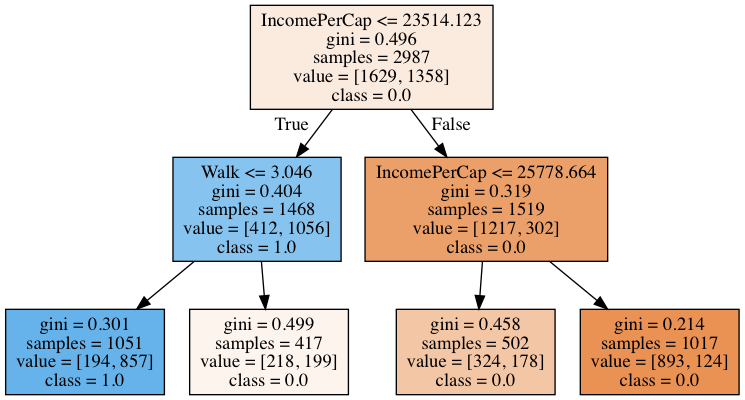

In [446]:
# This code will visualize a decision tree dt, trained with the attributes in X and the class labels in Y
dt_feature_names = list(X.columns)
dt_target_names = np.array(Y.unique(),dtype=np.string_) 
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

change - Within counties whose income per capita is less than \$23514, counties where more than 78.58% of workers commute by driving have higher mortality rates. Within counties whose income per capita is greater than $23514, counties where less than 3.17% of workers work from home have higher mortality rates.

In [447]:
df_deathrate['binned_walk'] = pd.cut(df_deathrate.Walk,bins=[0,3.046,100])
df_deathrate['binned_income'] = pd.cut(df_deathrate.IncomePerCap,bins=[0,23514.123,25778.664,50000])

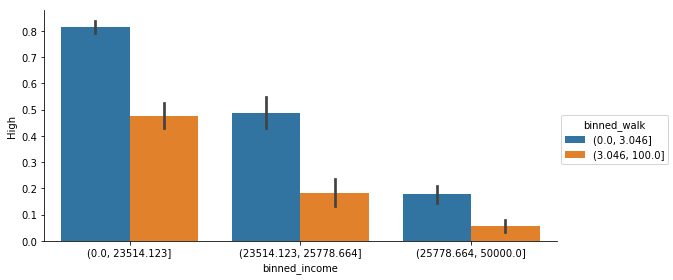

In [448]:
sns.factorplot(hue='binned_walk', y='High', x ='binned_income', data=df_deathrate, aspect=2, kind='bar')

### Classification for Prediction

In [449]:
from sklearn.model_selection import train_test_split

In [450]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state = 0)

In [451]:
type(X_train)

pandas.core.frame.DataFrame

In [452]:
len(X_train)

2090

In [453]:
len(X)

2987

In [454]:
len(Y_train)

2090

In [455]:
len(X_train) / float(len(X)) 

0.6996986943421493

In [456]:
len(X_test)

897

In [457]:
len(X_train) + len(X_test)

2987

#### Training test

In [458]:
from sklearn.ensemble import RandomForestClassifier

In [459]:
cl = RandomForestClassifier(random_state = 0)
cl.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [460]:
len(X_train)

2090

In [461]:
len(X_test)

897

#### Prediction

In [462]:
(cl.predict(X_test) == Y_test).mean()

0.80379041248606464

In [463]:
y_pred = cl.predict(X_test)

In [464]:
y_pred[:20]

array([ 0.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,
        1.,  0.,  1.,  1.,  0.,  1.,  0.])

In [465]:
cl.predict_proba(X_test)

array([[ 0.5,  0.5],
       [ 0.5,  0.5],
       [ 0. ,  1. ],
       ..., 
       [ 0.8,  0.2],
       [ 0.2,  0.8],
       [ 0.8,  0.2]])

In [466]:
y_pred_proba = cl.predict_proba(X_test)[:,1]

In [467]:
y_pred_proba[:20]

array([ 0.5,  0.5,  1. ,  0.3,  0.9,  0.9,  0.1,  0. ,  0.3,  0.1,  0.6,
        0.8,  0.2,  0.9,  0.1,  0.9,  0.7,  0.2,  0.6,  0.3])

In [468]:
from sklearn.metrics import confusion_matrix

In [469]:
confusion_matrix(Y_test,y_pred)

array([[429,  60],
       [116, 292]])

In [470]:
#accuracy
(y_pred == Y_test).mean()

0.80379041248606464

In [471]:
#Precision
import sklearn.metrics as met

In [472]:
met.precision_score(Y_test,y_pred)

0.82954545454545459

In [473]:
Y_test.mean()

0.45484949832775917

In [474]:
#Recall
met.recall_score(Y_test,y_pred)

0.71568627450980393

In [475]:
#AUC Score
met.roc_auc_score(Y_test,y_pred_proba)

0.87589969525642564

In [476]:
from sklearn.model_selection import KFold

In [477]:
nfolds = 10

In [478]:
kf = KFold(n_splits=nfolds,random_state=0,shuffle=True)

In [479]:
avgCV_AUC = sk.model_selection.cross_val_score(cl,X,Y,cv=kf,n_jobs=-1,\
                                                    scoring='roc_auc').mean()

In [480]:
avgCV_AUC

0.88952559989894553

In [481]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

clfs = [DecisionTreeClassifier(), sk.ensemble.RandomForestClassifier(n_jobs=-1), sk.naive_bayes.GaussianNB(),
        sk.linear_model.LogisticRegression(n_jobs=-1),sk.tree.DecisionTreeClassifier(),sk.ensemble.AdaBoostClassifier(),
        QuadraticDiscriminantAnalysis(),MLPClassifier(),SVC()]

In [482]:
maxAUC = -1
bestCL = ""
for cl in clfs:
    auc = sk.model_selection.cross_val_score(cl,X,Y,cv=kf,n_jobs=-1,scoring='roc_auc').mean()
    print (str(cl) + ' ' + str(auc))
    if auc > maxAUC:
        bestCL = cl
        maxAUC = auc
print('***********************************************')
print ('Best is... ' + str(bestCL) + ' ' + str(maxAUC))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') 0.754578623213
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) 0.886115836511
GaussianNB(priors=None) 0.855504891959


/Users/katharinelovellgrant/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.

/Users/katharinelovellgrant/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.

/Users/katharinelovellgrant/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.

/Users/katharinelovellgrant/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.

/Users/katharinelovellgrant/Library/Enth

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) 0.858603315926
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') 0.754578623213
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None) 0.900506410311
QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001) 0.849780205676
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto',

## Finding 2: Income from Profession 

In [186]:
dftree = df_all.copy()

In [187]:
df_all.IncomePerCap.mean()

24307.89035776067

In [188]:
dftree['HighIncome'] = (dftree.IncomePerCap > 24307.89)*1.0

In [189]:
dftree.drop(['HIV_TB','CommonInfectious','Tropical','Maternal','Neonatal','Nutritional','OtherCMNN','Neoplasms','ChronicResp','ChronicLiver','Digestive','Neurological','MentalandSubst','DiabetesEtc','Musculoskeletal','OtherNoncommun','TransportInj','UnintentionalInj','SelfHarmandViolence','ForcesofNature','Cardiovasc'], axis=1,inplace=True)

In [190]:
X = dftree.drop(['CountyState','Location','State','IncomePerCap','HighIncome','Poverty','Unemployment','TotalRate','High'],axis=1)

In [191]:
Y = dftree.HighIncome

In [192]:
dt = tree.DecisionTreeClassifier(max_depth=2)

In [193]:
dt.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

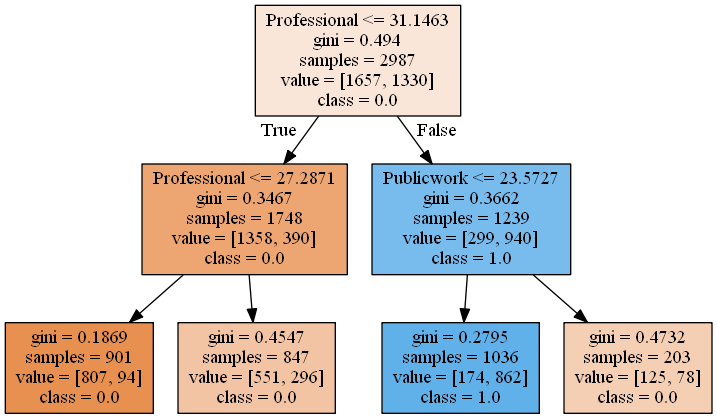

In [194]:
# This code will visualize a decision tree dt, trained with the attributes in X and the class labels in Y
dt_feature_names = list(X.columns)
dt_target_names = np.array(Y.unique(),dtype=np.string_) 
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

Within counties where less than 31.15% of workers are in professional jobs, counties where less than 27.29% of workers are in professional jobs have lower income per capita. Within counties where more than 31.15% of workers are in professional jobs, counties where less than 23.57% of workers are in the public sector have higher income per capita.

In [195]:
dftree.Professional.mean()

30.827700188885128

In [201]:
dftree['binned_public'] = pd.cut(dftree.Publicwork,bins=[0,31.46,100])
dftree['binned_income'] = pd.cut(dftree.IncomePerCap,bins=[0,23514.123,25778.664,50000])
dftree['binned_prof'] = pd.cut(dftree.Professional,bins=[0,27.28,100])

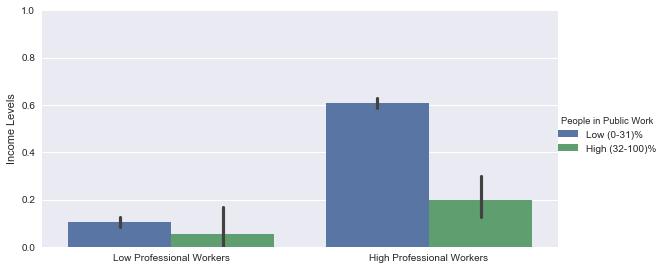

In [222]:
g =sns.factorplot(hue='binned_public', y='HighIncome', x ='binned_prof', data=dftree, aspect=2, kind='bar', legend_out = True)
#data=tips, markers=["o", "x"], legend_out = True)
g.set_axis_labels("", "Income Levels")
g.set_xticklabels(["Low Professional Workers", "High Professional Workers"])
g.set_titles("{col_name} {col_var}")
g.set(ylim=(0, 1))
g.despine(left=True) 
new_title = 'People in Public Work'
g._legend.set_title(new_title)
# replace labels
new_labels = ['Low (0-31)%', 'High (32-100)%']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

sns.plt.show()

## Finding 3: Mortality by Transportation

In [491]:
df_deathrate1 = df_all.copy()

In [492]:
df_deathrate1.drop(['HIV_TB','CommonInfectious','Tropical','Maternal','Neonatal','Nutritional','OtherCMNN','Neoplasms','ChronicResp','ChronicLiver','Digestive','Neurological','MentalandSubst','DiabetesEtc','Musculoskeletal','OtherNoncommun','TransportInj','UnintentionalInj','SelfHarmandViolence','ForcesofNature','Cardiovasc'], axis=1,inplace=True)

In [493]:
X = df_deathrate1.drop(['High','CountyState','State','Location', 'TotalRate','Professional', 'Service', 'Construction', 'Production','Office','Privatework','Selfemployed','Familywork','IncomePerCap'] , axis = 1)

In [494]:
Y = df_deathrate1.High

In [495]:
dt = tree.DecisionTreeClassifier(max_depth=2)

In [496]:
dt.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

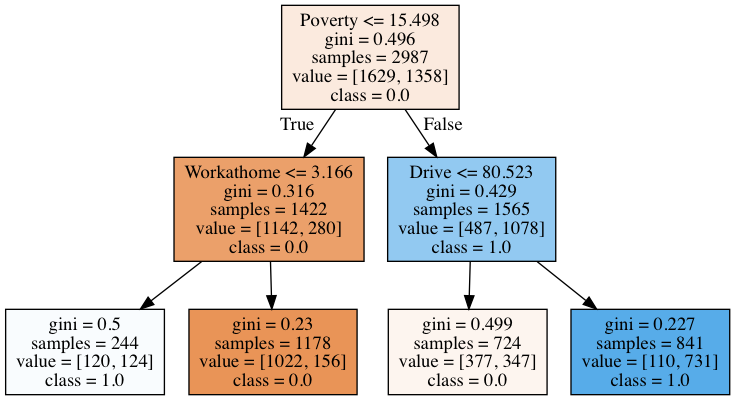

In [497]:
# This code will visualize a decision tree dt, trained with the attributes in X and the class labels in Y
dt_feature_names = list(X.columns)
dt_target_names = np.array(Y.unique(),dtype=np.string_) 
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

Within counties where less than 15.50% of people live in povery, counties where more than 3.17% of workers work from home have lower mortality rates. Within counties where more than 15.50% of people live in povery, counties where more than 80.52% of workers commute by driving have higher mortality rates.

#### Validation

In [498]:
df_deathrate1.Workathome.mean()

4.7330959220332831

In [499]:
df_deathrate1['HighWorkathome']=(df_deathrate1.Workathome > 4.605)*1.0

In [500]:
df_deathrate1['binned_Poverty']=pd.cut(df_deathrate1.Poverty, 4)

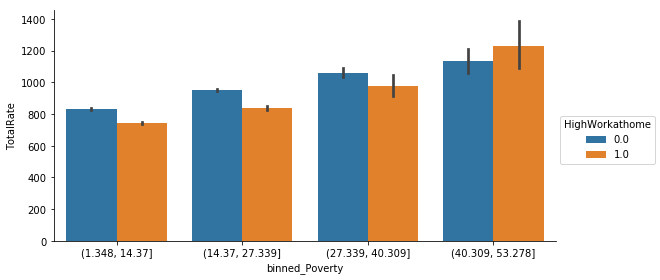

In [501]:
sns.factorplot(x='binned_Poverty', y='TotalRate', data=df_deathrate1, aspect=2, kind='bar', hue='HighWorkathome')

## Finding 4: Mortality by Work Category

In [508]:
df_deathrate3 = df_deathrate.copy()

In [509]:
X = df_deathrate3.drop(['High','CountyState','State','Location','Workathome','Privatework','Selfemployed','Familywork','Drive','MalePerc','Hispanic','White','Black','Native','Asian','Pacific','TotalRate','Walk','Poverty','IncomePerCap','Unemployment','binned_walk','binned_income'] , axis = 1)

In [511]:
Y = df_deathrate3.High

In [512]:
dt = tree.DecisionTreeClassifier(max_depth=2)

In [513]:
dt.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

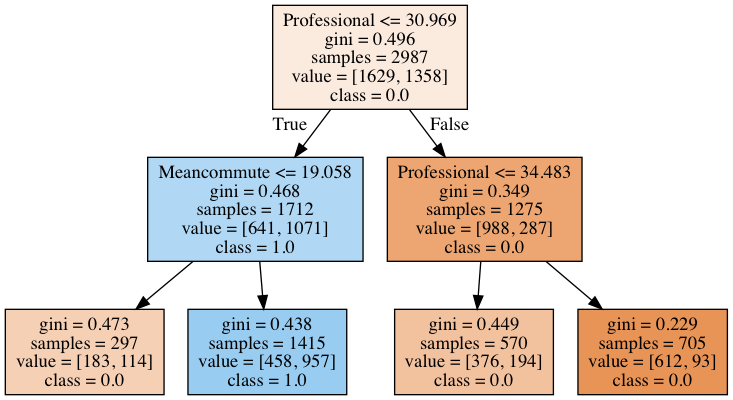

In [514]:
# This code will visualize a decision tree dt, trained with the attributes in X and the class labels in Y
dt_feature_names = list(X.columns)
dt_target_names = np.array(Y.unique(),dtype=np.string_) 
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

Within counties where less than 30.97% of workers are in professional jobs, counties where the mean commute time is more than 19.06 minutes have higher mortality rates. Counties where more than 30.97% of workers are in professional jobs have lower mortality rates.

#### Validation

In [515]:
df_deathrate1.Meancommute.mean()

23.228723995000816

In [516]:
df_deathrate1['Highcommute']=(df_deathrate1.Meancommute > 23.229)*1.0

In [517]:
df_deathrate1['binned_Professional']=pd.cut(df_deathrate1.Professional, 3)

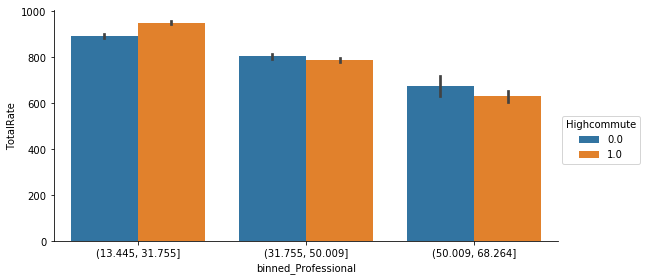

In [518]:
sns.factorplot(x='binned_Professional', y='TotalRate', data=df_deathrate1, aspect=2, kind='bar', hue='Highcommute')

## Finding 5: Predicting Cardiovascular Mortality

In [519]:
df_Cardio = df_all.copy()

In [520]:
df_Cardio.Cardiovasc.mean()

277.11708068295945

In [521]:
df_Cardio['HighCardio']=(df_Cardio.Cardiovasc > 277.117081)*1.0

In [522]:
df_Cardio.drop(['HIV_TB','CommonInfectious','Tropical','Maternal','Neonatal','Nutritional','OtherCMNN','Neoplasms','ChronicResp','ChronicLiver','Digestive','Neurological','MentalandSubst','DiabetesEtc','Musculoskeletal','OtherNoncommun','TransportInj','UnintentionalInj','SelfHarmandViolence','ForcesofNature','Cardiovasc'], axis=1,inplace=True)

#### Overall

In [523]:
X = df_Cardio.drop(['State','CountyState','Location','HighCardio','TotalRate','High','Fips'],axis=1)

In [524]:
Y = df_Cardio.HighCardio

In [525]:
dt.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

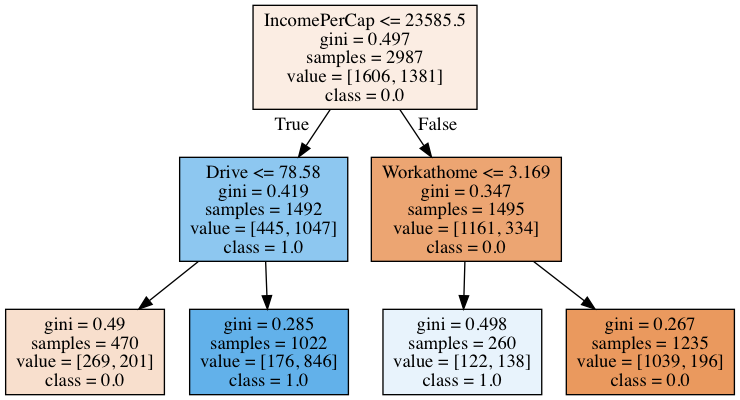

In [526]:
# This code will visualize a decision tree dt, trained with the attributes in X and the class labels in Y
dt_feature_names = list(X.columns)
dt_target_names = np.array(Y.unique(),dtype=np.string_) 
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

Within counties whose income per capita is less than \$23585, counties where more than 78.58% of workers commute by driving have higher mortality rates for cardiovascular disease. Within counties whose income per capita is greater than $23514, counties where less than 3.17% of workers work from home have higher mortality rates.

#### Work-Based

In [527]:
X = df_Cardio.drop(['State','CountyState','Location','HighCardio','TotalRate','High','Fips','MalePerc','CitizenPerc',
                     'TotalPop','Drive','Walk','Carpool','Transit','Othertransp', 'Workathome','Meancommute','Hispanic', 'White', 
                     'Black', 'Native', 'Asian','Pacific','Poverty'],axis=1)

In [528]:
X.columns

Index([u'Employed', u'IncomePerCap', u'Professional', u'Service', u'Office',
       u'Construction', u'Production', u'Privatework', u'Publicwork',
       u'Selfemployed', u'Familywork', u'Unemployment'],
      dtype='object')

In [529]:
Y = df_Cardio.HighCardio

In [530]:
dt.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

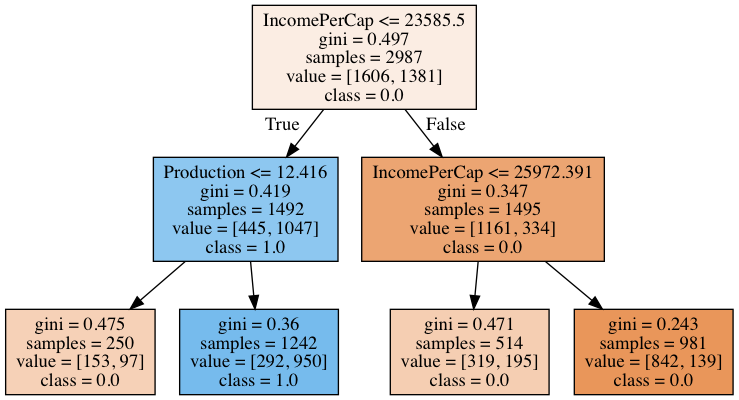

In [531]:
# This code will visualize a decision tree dt, trained with the attributes in X and the class labels in Y
dt_feature_names = list(X.columns)
dt_target_names = np.array(Y.unique(),dtype=np.string_) 
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

Within counties whose income per capita is less than \$23585, counties where more than 12.42% of workers have production jobs have higher mortality rates for cardiovascular disease. Counties whose income per capita is greater than $23585 have higher mortality rates for cardiovascular disease.

In [532]:
df_Cardio['binned_income'] = pd.cut(df_Cardio['IncomePerCap'],bins=[0,10000,23400,100000])

In [533]:
df_Cardio.Production.mean()

15.99521590337859

In [534]:
df_Cardio['HighProd']=(df_Cardio.Production > 15.995)*1.0

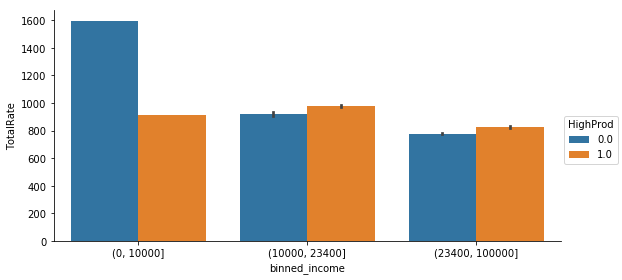

In [535]:
sns.factorplot(x='binned_income', y='TotalRate', data=df_Cardio, aspect=2, kind='bar', hue='HighProd')

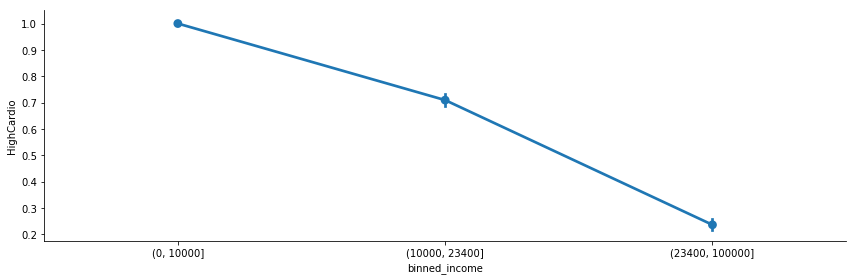

In [536]:
sns.factorplot(x='binned_income',y='HighCardio',data=df_Cardio,aspect =3)

## Finding 6: Predicting Neoplasm Mortality

In [537]:
df_Cancer = df_all.copy()

In [538]:
df_Cancer.Neoplasms.mean()

205.5752929360562

In [539]:
df_Cancer['HighCancer']=(df_Cancer.Neoplasms > 205.58)*1.0

In [540]:
df_Cancer.drop(['HIV_TB','CommonInfectious','Tropical','Maternal','Neonatal','Nutritional','OtherCMNN','Neoplasms','ChronicResp','ChronicLiver','Digestive','Neurological','MentalandSubst','DiabetesEtc','Musculoskeletal','OtherNoncommun','TransportInj','UnintentionalInj','SelfHarmandViolence','ForcesofNature','Cardiovasc'], axis=1,inplace=True)

In [541]:
X = df_Cancer.drop(['State','CountyState','Location','HighCancer','TotalRate','High'],axis=1)

In [542]:
Y = df_Cancer.HighCancer

In [543]:
dt.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

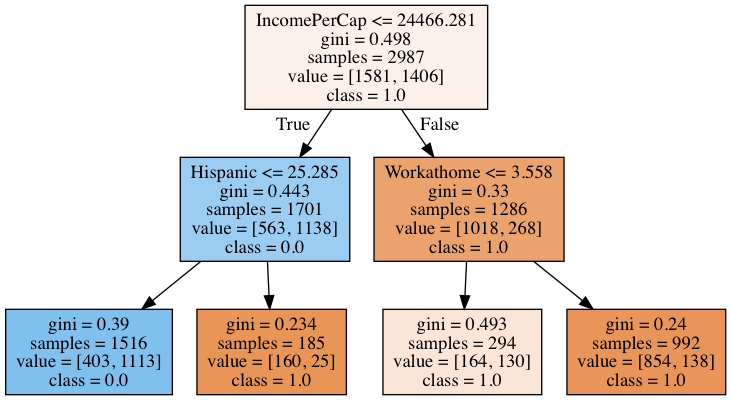

In [544]:
# This code will visualize a decision tree dt, trained with the attributes in X and the class labels in Y
dt_feature_names = list(X.columns)
dt_target_names = np.array(Y.unique(),dtype=np.string_) 
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

Within counties whose income per capita is less than \$24466, counties where less than 25.28% of the population are Hispanic have higher mortality rates. Within counties whose income per capita is greater than $24466, counties where more than 3.56% of workers work from home have lower mortality rates.

#### Validation

In [545]:
df_all['binned_income'] = pd.cut(df_all['IncomePerCap'],bins=[0,10000,24400,100000])
df_all['binned_income1'] = pd.cut(df_all['IncomePerCap'],bins=[0,24400,100000])

In [546]:
df_all.Hispanic.mean()

8.9915937147283582

In [547]:
df_all['HighHisp']=(df_all.Hispanic > 8.99)*1.0

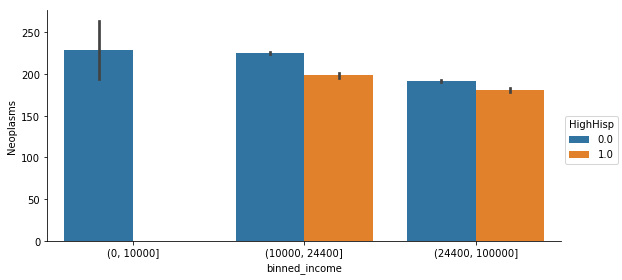

In [549]:
sns.factorplot(x='binned_income', y='Neoplasms', data=df_all, aspect=2, kind='bar', hue='HighHisp')

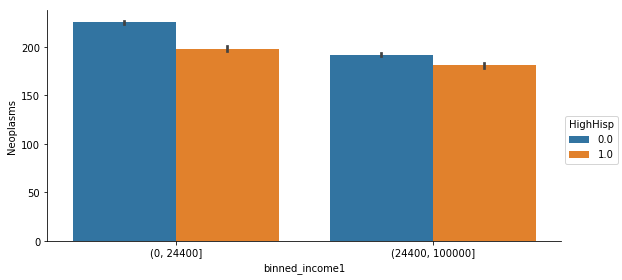

In [548]:
sns.factorplot(x='binned_income1', y='Neoplasms', data=df_all, aspect=2, kind='bar', hue='HighHisp')